In [1422]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 14/12/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 14/12/2022\nPython version: 3.8.8\n'

---
## General Information <a id="GI"> </a> 

### Folder structure <a id="Folder"> </a>


### Imports <a id="Imports"> </a>

***Libraries used for milestone 2:***


In [1423]:
import sys
print(sys.executable)

/Users/guillaumeryelandt/opt/anaconda3/envs/ADA/bin/python


In [1424]:
#Imports used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from scipy.stats import t
from scipy.stats import chi2_contingency
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

### Paths <a id="Paths"> </a>

Required to adapt those path to local file organization

In [1425]:
### PATHs for dataset:
PATH_DATA = 'data/'

#additionnal datasets:
PATH_MOVIE_OSCAR_NOMINEES = PATH_DATA+'oscar_nominees.csv'
PATH_MOVIE_OSCAR= PATH_DATA+'oscar_nom_win.csv'

---
##  Data scraping, pre-processing and dataset construction<a id="Step-1"> </a>

## Oscars NOMINEES

### Pre-processing <a id="#Pre-pro"> </a>
> basic sanity checks 

In [1426]:
print("Reading in movie data")

#Read in movie metadata, plot summaries, and character metadata.
oscar_nominees=pd.read_csv(PATH_MOVIE_OSCAR_NOMINEES,header=0)
oscar_nominees=oscar_nominees.sort_values(by='year',ascending=True)
oscar_nominees['dups_nominees'] = oscar_nominees.duplicated()
#replace name of column year by year_ceremony
oscar_nominees.rename(columns={'year':'year_ceremony'}, inplace=True)

oscar_nominees

Reading in movie data


,name,gender,category,year_ceremony,dups_nominees
3294,William Cameron Menzies,male,Production Design,1929,False
2031,Karl Struss,male,Cinematography,1929,False
3192,Harry Oliver,male,Production Design,1929,False
2478,Rochus Gliese,male,Production Design,1929,False
1586,George Barnes,male,Cinematography,1929,False
...,...,...,...,...,...
4488,Matthew Wood,male,Sound Editing,2018,False
4268,Patrick Tubach,male,Visual Effects,2019,False
1733,Yorgos Lanthimos,male,Director,2019,False
7360,Guy Nattiv,male,Live Action Short Film,2019,False


In [1427]:
#check for the duplcates in the dataset
#print(oscar_nominees[oscar_nominees.duplicated()])
oscar_nominees[oscar_nominees.duplicated()]

,name,gender,category,year_ceremony,dups_nominees
1584,George Barnes,male,Cinematography,1929,True
3297,William Cameron Menzies,male,Production Design,1930,True
853,Frank Lloyd,male,Director,1930,True
2215,Hans Dreier,male,Production Design,1930,True
5473,Nathan Levinson,male,Sound Mixing,1934,True
6099,Walt Disney,male,Animated Short Film,1939,True
6101,Walt Disney,male,Animated Short Film,1939,True
4585,Victor Young,male,Original Score,1940,True
4588,Victor Young,male,Original Score,1941,True
9073,Victor Young,male,Original Dramatic or Comedy Score,1943,True


>It is uncertain wether there has been an error in the encoding or if a person has been nominated twice for a movie, let's just keep them

In [1428]:
print('there are nominees in the dataset',len(oscar_nominees))

there are nominees in the dataset 9599


In [1429]:
oscar_nominees.name.is_unique

False

In [1430]:
oscar_nominees.isna().any()

name             False
gender            True
category         False
year_ceremony    False
dups_nominees    False
dtype: bool

In [1431]:
#check if any NaN features in the dataset 
oscar_nominees[oscar_nominees['gender'].isna()]

,name,gender,category,year_ceremony,dups_nominees
7339,Hayward Anderson,NaN,Live Action Short Film,1963,False
6760,Algernon G. Wlaker,NaN,Documentary (Short Subject),1964,False
6822,Denny Evans,NaN,Live Action Short Film,1972,False
7198,Humphrey Swingler,NaN,Documentary (Short Subject),1973,False
6764,Barrie Howells,NaN,Documentary (Short Subject),1976,False
7095,Sparky Greene,NaN,Documentary (Short Subject),1977,False
7200,K.K. Kapil,NaN,Documentary (Short Subject),1979,False
6934,Fern Field,NaN,Live Action Short Film,1979,False
7149,Freddi Stevens,NaN,Documentary (Short Subject),1982,False
6639,Jan Saunders,NaN,Live Action Short Film,1983,False


> We tried to retrieve the genre for these people but the procedure is quite complicated as we often did not find them, we will thus just drop them.

In [1432]:
#drop the NaN values
oscar_nominees.dropna(inplace=True)
#reset the index
oscar_nominees.reset_index(drop=True,inplace=True)
oscar_nominees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9570 entries, 0 to 9569
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           9570 non-null   object
 1   gender         9570 non-null   object
 2   category       9570 non-null   object
 3   year_ceremony  9570 non-null   int64 
 4   dups_nominees  9570 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 308.5+ KB


## first exploration of the nominees dataset 

In [1433]:
oscar_nominees.gender.value_counts()

male          8544
female        1025
non-binary       1
Name: gender, dtype: int64

In [1434]:
oscar_nominees[oscar_nominees['gender'] == 'non-binary']

,name,gender,category,year_ceremony,dups_nominees
9290,Sam Smith,non-binary,Original Song,2016,False


> Sam Smith is the only nominee whic is not neither woman or man. We will ignore it, as it is not relevant for our analysis.

In [1435]:
# drop rows with non-binary
oscar_nominees.drop(oscar_nominees[oscar_nominees['gender'] == 'non-binary'].index, inplace = True)

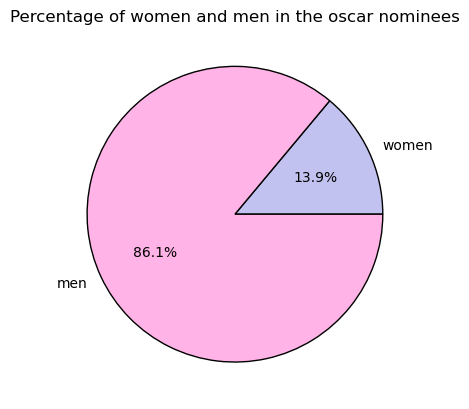

In [1436]:
#vizualisation 
#number of female nominees compared to male nominees
fem_nominees = oscar_nominees[oscar_nominees['gender'] == 'female']
man_nominees = oscar_nominees[oscar_nominees['gender'] == 'male']

plt.pie(np.array([fem_nominees['name'].nunique(),man_nominees['name'].nunique()]),labels=['women','men'],colors = ['#c2c2f0','#ffb3e6'],autopct='%1.1f%%',   wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.title('Percentage of women and men in the oscar nominees')
plt.show()

In [1437]:
#separate by gender 
oscar_nominees_males=oscar_nominees[oscar_nominees['gender']=='male']
oscar_nominees_females=oscar_nominees[oscar_nominees['gender']=='female']

#sanity checks 
len(oscar_nominees_males)+len(oscar_nominees_females)+oscar_nominees['gender'].isna().sum()==len(oscar_nominees)

True

In [1438]:
oscar_nominees_count=oscar_nominees.category.value_counts().to_frame().rename(columns={"category": "total"})
oscar_nominees_count_female=oscar_nominees_females.category.value_counts().to_frame().rename(columns={"category": "females"})
oscar_nominees_count_male=oscar_nominees_males.category.value_counts().to_frame().rename(columns={"category": "males"})
oscar_nominees_count=pd.concat([oscar_nominees_count,oscar_nominees_count_female,oscar_nominees_count_male,],axis=1)
oscar_nominees_count


,total,females,males
Sound Mixing,1049,15.0,1034
Production Design,731,140.0,591
"Writing, Adapted Screenplay",661,69.0,592
"Writing, Original Screenplay",623,59.0,564
Film Editing,542,77.0,465
Visual Effects,499,3.0,496
Director,442,5.0,437
Animated Short Film,423,41.0,382
Documentary (Short Subject),400,113.0,287
"Art Direction, Black and White",380,7.0,373


In [1439]:
#The 2 last rows are deleted, 
oscar_nominees_count.drop(oscar_nominees_count.tail(2).index, inplace = True)

Text(0.5, 1.0, 'Number of nominees in each category by genres')

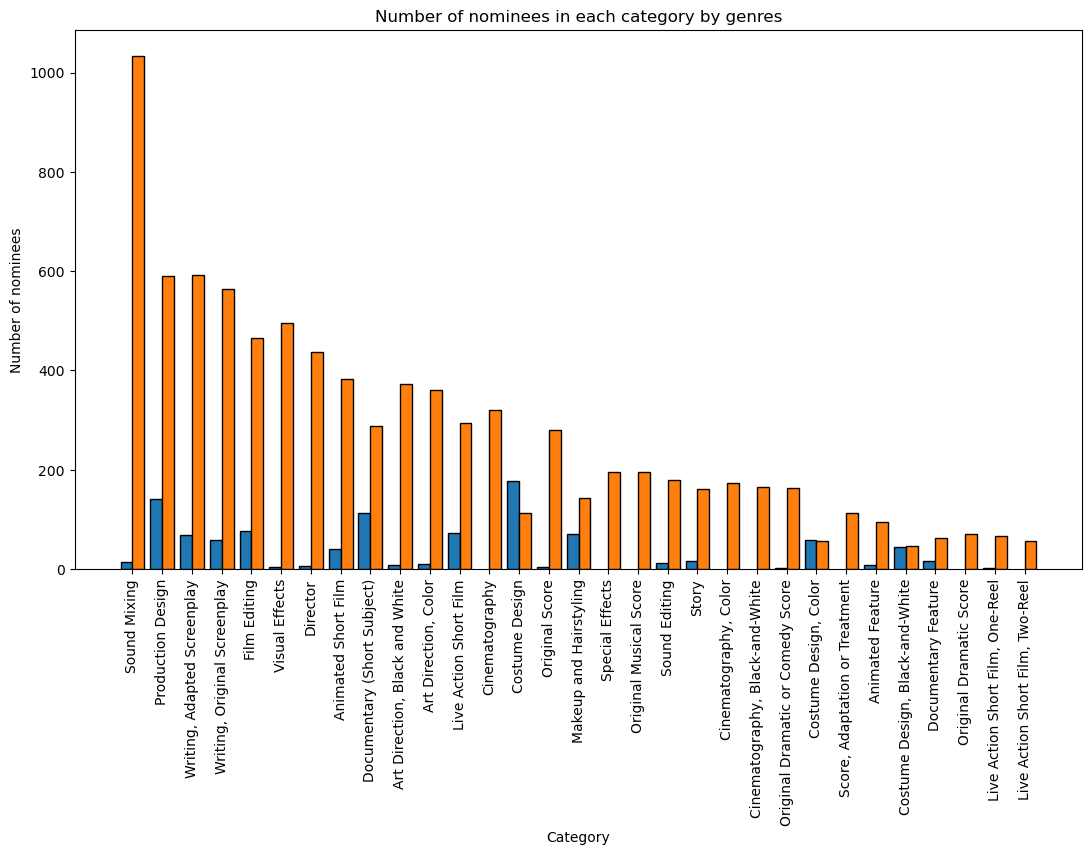

In [1440]:
X_axis = np.arange(len(oscar_nominees_count))

plt.figure(figsize=(13,7))
plt.bar(X_axis - 0.2, oscar_nominees_count.females, 0.4, label = 'females',edgecolor = 'black')
plt.bar(X_axis + 0.2,oscar_nominees_count.males, 0.4, label = 'males',edgecolor = 'black')

 
plt.xticks(X_axis, oscar_nominees_count.index,rotation=90)
plt.xlabel("Category")
#plt.yscale('log')
plt.ylabel("Number of nominees")
plt.title("Number of nominees in each category by genres")


> The data indicates that there is a potential gender bias in the movie industry, as the number of male and female nominees in many categories is not balanced. This gender gap is a significant issue that needs to be further studied and addressed in order to promote diversity and equality in the industry. It is important to monitor whether this gap has evolved over time. 

## Number of nominees over the years <a id="#explo"> </a>
> To determine whether there has been any evolution in the gender gap in the movie industry over time, we will need to analyze the evolution of nominees among all categories over the years. This will help us identify any trends or changes in the representation of male and female nominees, and allow us to evaluate whether progress has been made in promoting gender equality in the movie industry.

In [1441]:
oscar_nominees_evol=oscar_nominees.year_ceremony.value_counts().to_frame().rename(columns={"year_ceremony": "total"})
oscar_nominees_evol_female=oscar_nominees_females.year_ceremony.value_counts().to_frame().rename(columns={"year_ceremony": "females"})
oscar_nominees_evol_male=oscar_nominees_males.year_ceremony.value_counts().to_frame().rename(columns={"year_ceremony": "males"})
oscar_nominees_evol=pd.concat([oscar_nominees_evol,oscar_nominees_evol_female,oscar_nominees_evol_male,],axis=1).sort_index(ascending=True).fillna(0)
oscar_nominees_evol.tail()

,total,females,males
2015,138,23.0,115
2016,152,31.0,121
2017,122,21.0,101
2018,8,1.0,7
2019,4,1.0,3


Text(0.5, 1.0, 'Number of nominees in all categories over the years by genres')

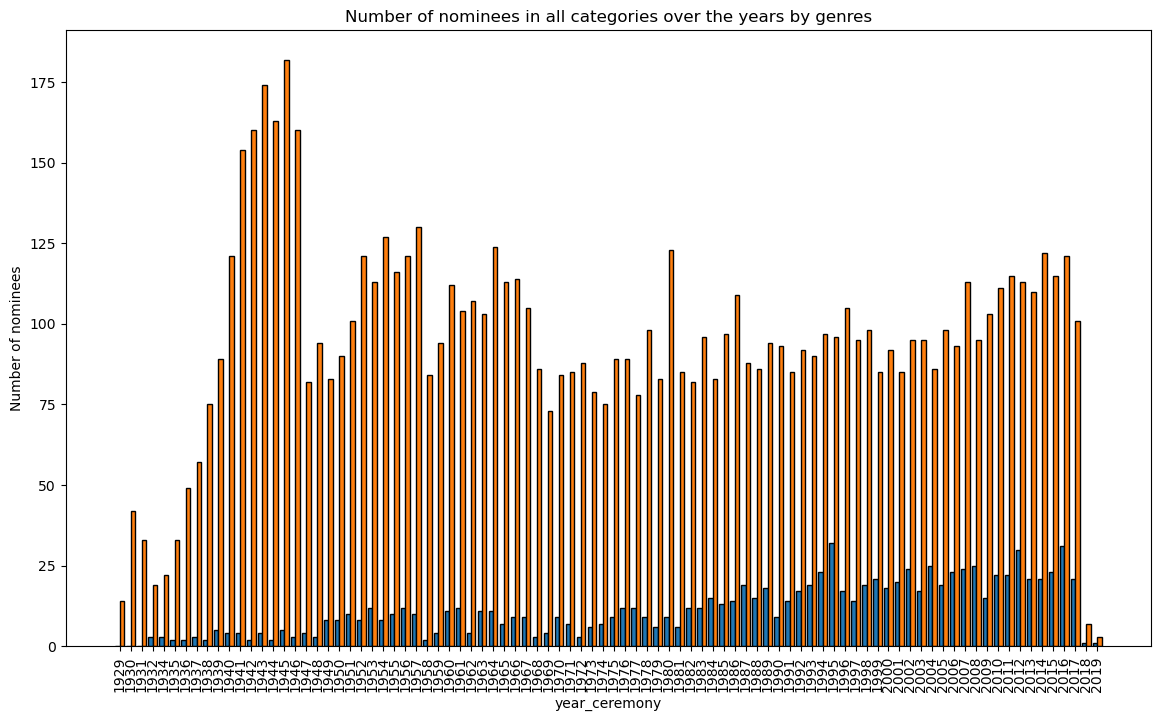

In [1442]:
X_axis = np.arange(len(oscar_nominees_evol))

plt.figure(figsize=(14,8))
#plt.bar(X_axis - 0.2, oscar_nominees_evol.females/oscar_nominees_evol.total, 0.4, label = 'females',edgecolor = 'black')
#plt.bar(X_axis + 0.2,oscar_nominees_evol.males/oscar_nominees_evol.total, 0.4, label = 'males',edgecolor = 'black')
plt.bar(X_axis - 0.2, oscar_nominees_evol.females, 0.4, label = 'females',edgecolor = 'black')
plt.bar(X_axis + 0.2,oscar_nominees_evol.males, 0.4, label = 'males',edgecolor = 'black')
 
plt.xticks(X_axis, oscar_nominees_evol.index,rotation=90)
plt.xlabel("year_ceremony")
#plt.yscale('log')
plt.ylabel("Number of nominees")
plt.title("Number of nominees in all categories over the years by genres")

>The bar chart above shows the relative proportions of men and women nominated in all categories over the years. As we can see, the last two years have significantly fewer nominees compared to previous years, so we will exclude them from our analysis.

In [1443]:
oscar_nominees_evol.drop(oscar_nominees_evol.tail(2).index, inplace = True)
oscar_nominees_evol

,total,females,males
1929,14,0.0,14
1930,42,0.0,42
1931,33,0.0,33
1932,22,3.0,19
1934,25,3.0,22
...,...,...,...
2013,131,21.0,110
2014,143,21.0,122
2015,138,23.0,115
2016,152,31.0,121


> We will now conduct a regression analysis to determine if there has been a change in the proportion of women nominated among all categories over the years. In this case, the dependent variable could be a measure of the gender gap (such as the difference in wages between men and women) and the independent variable could be time.
 This slope would represent the rate at which the gender gap is changing over time.

In [1444]:
#perform a linear regression 
X = oscar_nominees_evol.index  
Y =oscar_nominees_evol.females/oscar_nominees_evol.total
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     194.7
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           8.35e-24
Time:                        07:39:24   Log-Likelihood:                 172.99
No. Observations:                  88   AIC:                            -342.0
Df Residuals:                      86   BIC:                            -337.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8457      0.283    -13.585      0.0

>The results of the regression tend to indicate that there is a positive relationship between the proportion of women in the nominees (the dependent variable) and time (the independent variable). The positive coefficient for the time (x1) indicates this. 

> The R^2 values lead to indicate that about 69% of the variation in the dependent variable can be explained by the independent variable. This coeffcient is relatively high and indicates a good fit of the data. 

>The F-statistic of 194.6 and the associated p-value of 8.5e-24 indicate that the model is statistically significant, which means that it unlikely that results have occured by pure chance. Moreover this confirmed by the t-value of 13.948 and the associated p-value of 0.000. 

> Overall, these results suggest that there has been a positive and statistically significant change in the proportion of women in the nominees for the Academy Awards over time. Nevertheless, it is important to note that this conclusion is based on the assumption that the model is a good fit to the data and that all relevant factors have been included in the model. Here regression is just one tool to examine the changes in the gender gap. In addition, here we just took all categories and look the OVERALL number of nominees, we might need to investigate the categories one by one. 

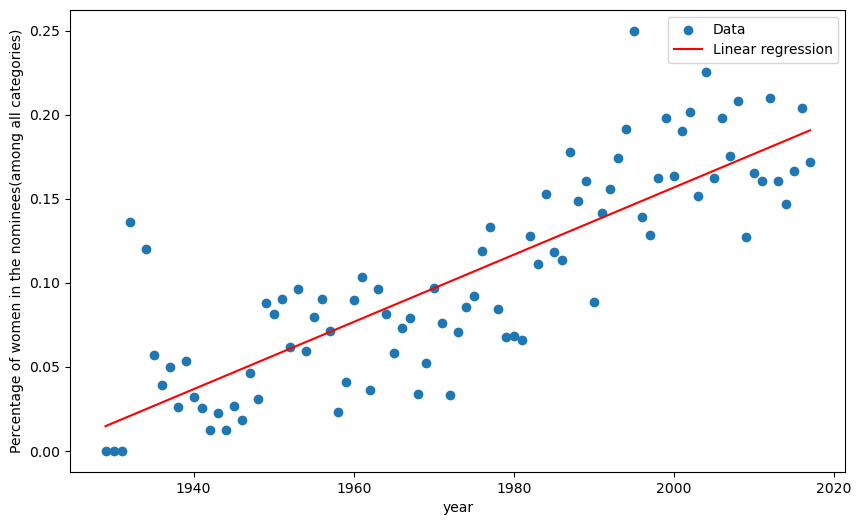

In [1469]:
#plot the linear regression results
plt.figure(figsize=(10,6))
plt.scatter(oscar_nominees_evol.index,oscar_nominees_evol.females/oscar_nominees_evol.total)
plt.plot(oscar_nominees_evol.index, predictions, color='red')
#add a legend
plt.legend(['Data','Linear regression'])
plt.xlabel("year")
plt.ylabel("Percentage of women in the nominees(among all categories)")
plt.show()

> What we have seen so far is that, the Academy Awards, or Oscars, have historically been dominated by male nominees. However, it appears that there has been some progress in terms of gender equality in recent years, as the proportion of female nominees has increased. To further investigate whether there is gender discrimination in the Oscars, we can collect data on the winners in specific categories for which we have sufficient data. By analyzing the proportion of male and female winners, we can determine whether men are more likely to win an Oscar than women. 

## Oscars NOMINEES+WINNERS

In [1446]:
#load and read datasets
oscars = pd.read_csv(PATH_MOVIE_OSCAR)
oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10395 entries, 0 to 10394
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10395 non-null  int64 
 1   year_ceremony  10395 non-null  int64 
 2   ceremony       10395 non-null  int64 
 3   category       10395 non-null  object
 4   name           10395 non-null  object
 5   film           10091 non-null  object
 6   winner         10395 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 497.5+ KB


>it is clear that the column film has missing entries. Let us see what is happening

In [1447]:
#print missing values in film column
oscars[oscars['film'].isna()]

,year_film,year_ceremony,ceremony,category,name,film,winner
16,1927,1928,1,ENGINEERING EFFECTS,Ralph Hammeras,NaN,False
18,1927,1928,1,ENGINEERING EFFECTS,Nugent Slaughter,NaN,False
31,1927,1928,1,WRITING (Title Writing),Joseph Farnham,NaN,True
32,1927,1928,1,WRITING (Title Writing),"George Marion, Jr.",NaN,False
33,1927,1928,1,SPECIAL AWARD,Warner Bros.,NaN,True
...,...,...,...,...,...,...,...
10266,2018,2019,91,IRVING G. THALBERG MEMORIAL AWARD,Kathleen Kennedy and Frank Marshall,NaN,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [1448]:
oscars[oscars['film'].isna()]['category'].unique()

array(['ENGINEERING EFFECTS', 'WRITING (Title Writing)', 'SPECIAL AWARD',
       'SOUND RECORDING', 'ASSISTANT DIRECTOR',
       'IRVING G. THALBERG MEMORIAL AWARD',
       'SPECIAL FOREIGN LANGUAGE FILM AWARD',
       'HONORARY FOREIGN LANGUAGE FILM AWARD', 'HONORARY AWARD',
       'JEAN HERSHOLT HUMANITARIAN AWARD', 'SPECIAL ACHIEVEMENT AWARD'],
      dtype=object)

>As we can see, they are related to honorary awards, or humanitarian causes, https://en.wikipedia.org/wiki/Jean_Hersholt_Humanitarian_Award for example. We are going to discard rows with 'IRVING G. THALBERG MEMORIAL AWARD',
       'SPECIAL FOREIGN LANGUAGE FILM AWARD',
       'HONORARY FOREIGN LANGUAGE FILM AWARD', 'HONORARY AWARD',
       'JEAN HERSHOLT HUMANITARIAN AWARD', 'SPECIAL ACHIEVEMENT AWARD'

In [1449]:
#drop rows with category 'IRVING G. THALBERG MEMORIAL AWARD', 'SPECIAL AWARD', 'HONORARY AWARD','JEAN HERSHOLT HUMANITARIAN AWARD', 'SPECIAL ACHIEVEMENT AWARD'
oscars = oscars[~oscars['category'].isin(['IRVING G. THALBERG MEMORIAL AWARD', 'SPECIAL AWARD', 'HONORARY AWARD','JEAN HERSHOLT HUMANITARIAN AWARD', 'SPECIAL ACHIEVEMENT AWARD'])]
oscars[oscars['film'].isna()]

,year_film,year_ceremony,ceremony,category,name,film,winner
16,1927,1928,1,ENGINEERING EFFECTS,Ralph Hammeras,NaN,False
18,1927,1928,1,ENGINEERING EFFECTS,Nugent Slaughter,NaN,False
31,1927,1928,1,WRITING (Title Writing),Joseph Farnham,NaN,True
32,1927,1928,1,WRITING (Title Writing),"George Marion, Jr.",NaN,False
145,1930,1931,4,SOUND RECORDING,Samuel Goldwyn - United Artists Studio Sound D...,NaN,False
146,1930,1931,4,SOUND RECORDING,Metro-Goldwyn-Mayer Studio Sound Department,NaN,False
147,1930,1931,4,SOUND RECORDING,Paramount Publix Studio Sound Department,NaN,True
148,1930,1931,4,SOUND RECORDING,RKO Radio Studio Sound Department,NaN,False
192,1931,1932,5,SOUND RECORDING,Metro-Goldwyn-Mayer Studio Sound Department,NaN,False
193,1931,1932,5,SOUND RECORDING,Paramount Publix Studio Sound Department,NaN,True


>the lines with 'film' missing will be difficult to obtain. For example, finding the film for which the assistant director has been nominated will be laborious, indeed, an assistant director may have different movies released in the same year, so it is much more easy to discard them.

In [1450]:
'''categories_to_drop = [('ENGINEERING EFFECTS', oscars['film'].isnull()), 
                     ('WRITING (Title Writing)', oscars['film'].isnull()),
                     ('SOUND RECORDING', oscars['film'].isnull()),
                     ('ASSISTANT DIRECTOR', oscars['film'].isnull()),
                     ('SPECIAL FOREIGN LANGUAGE FILM AWARD', oscars['film'].isnull()),
                     ('HONORARY FOREIGN LANGUAGE FILM AWARD', oscars['film'].isnull())
                    ]

for category, condition in categories_to_drop:
    oscars = oscars.drop(oscars[(oscars['category'] == category) & (condition)].index)'''
#drop rows with missing values in film column
oscars = oscars.drop(oscars[oscars['film'].isnull()].index)
oscars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10091 entries, 0 to 10390
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10091 non-null  int64 
 1   year_ceremony  10091 non-null  int64 
 2   ceremony       10091 non-null  int64 
 3   category       10091 non-null  object
 4   name           10091 non-null  object
 5   film           10091 non-null  object
 6   winner         10091 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 561.7+ KB


> now the dataset does not contain anymore missing entries


## MERGING
>we are interested to merge the 2 dataset. We need to know wether the nominees have won the oscar. 

In [1451]:
list(oscars['category'].unique())

['ACTOR',
 'ACTRESS',
 'ART DIRECTION',
 'CINEMATOGRAPHY',
 'DIRECTING (Comedy Picture)',
 'DIRECTING (Dramatic Picture)',
 'ENGINEERING EFFECTS',
 'OUTSTANDING PICTURE',
 'UNIQUE AND ARTISTIC PICTURE',
 'WRITING (Adaptation)',
 'WRITING (Original Story)',
 'WRITING (Title Writing)',
 'DIRECTING',
 'WRITING',
 'OUTSTANDING PRODUCTION',
 'SOUND RECORDING',
 'SHORT SUBJECT (Cartoon)',
 'SHORT SUBJECT (Comedy)',
 'SHORT SUBJECT (Novelty)',
 'ASSISTANT DIRECTOR',
 'FILM EDITING',
 'MUSIC (Scoring)',
 'MUSIC (Song)',
 'DANCE DIRECTION',
 'WRITING (Screenplay)',
 'ACTOR IN A SUPPORTING ROLE',
 'ACTRESS IN A SUPPORTING ROLE',
 'SHORT SUBJECT (Color)',
 'SHORT SUBJECT (One-reel)',
 'SHORT SUBJECT (Two-reel)',
 'MUSIC (Original Score)',
 'CINEMATOGRAPHY (Black-and-White)',
 'CINEMATOGRAPHY (Color)',
 'SPECIAL EFFECTS',
 'ART DIRECTION (Black-and-White)',
 'ART DIRECTION (Color)',
 'WRITING (Original Screenplay)',
 'DOCUMENTARY (Short Subject)',
 'MUSIC (Music Score of a Dramatic Picture)',
 'MU

In [1452]:
list(oscar_nominees.category.unique())

['Production Design',
 'Cinematography',
 'Writing, Adapted Screenplay',
 'Story',
 'Director',
 'Sound Mixing',
 'Animated Short Film',
 'Score, Adaptation or Treatment',
 'Film Editing',
 'Live Action Short Film, One-Reel',
 'Original Score',
 'Cinematography, Black-and-White',
 'Cinematography, Color',
 'Special Effects',
 'Art Direction, Black and White',
 'Art Direction, Color',
 'Writing, Original Screenplay',
 'Original Dramatic Score',
 'Original Musical Score',
 'Original Dramatic or Comedy Score',
 'Documentary Feature',
 'Live Action Short Film, Two-Reel',
 'Documentary (Short Subject)',
 'Costume Design, Black-and-White',
 'Costume Design, Color',
 'Foreign Language Film',
 'Costume Design',
 'Live Action Short Film',
 'Visual Effects',
 'Sound Editing',
 'Original Song',
 'Makeup and Hairstyling',
 'Animated Feature']

> we can see that some similar categories are written differently


In [1453]:
#remove upper case in the category column
oscars['category'] = oscars['category'].str.lower()
#remove '(' and ')' in the category column
#Setting `regex=False` in each of the calls to `str.replace()` will treat the search string as a literal string and 
# not a regular expression. This should prevent the warning from being displayed and allow the code to execute correctly.
oscars['category'] = oscars['category'].str.replace('(','',regex=False)
oscars['category'] = oscars['category'].str.replace(')','',regex=False)
oscar_nominees['category'] = oscar_nominees['category'].str.lower()
oscar_nominees['category'] = oscar_nominees['category'].str.replace('(','',regex=False) 
oscar_nominees['category'] = oscar_nominees['category'].str.replace(')','',regex=False)
oscar_nominees['category'] = oscar_nominees['category'].str.replace(',','',regex=False)
print(oscar_nominees['category'].unique())
print(oscars['category'].unique())
oscars

['production design' 'cinematography' 'writing adapted screenplay' 'story'
 'director' 'sound mixing' 'animated short film'
 'score adaptation or treatment' 'film editing'
 'live action short film one-reel' 'original score'
 'cinematography black-and-white' 'cinematography color' 'special effects'
 'art direction black and white' 'art direction color'
 'writing original screenplay' 'original dramatic score'
 'original musical score' 'original dramatic or comedy score'
 'documentary feature' 'live action short film two-reel'
 'documentary short subject' 'costume design black-and-white'
 'costume design color' 'foreign language film' 'costume design'
 'live action short film' 'visual effects' 'sound editing' 'original song'
 'makeup and hairstyling' 'animated feature']
['actor' 'actress' 'art direction' 'cinematography'
 'directing comedy picture' 'directing dramatic picture'
 'engineering effects' 'outstanding picture' 'unique and artistic picture'
 'writing adaptation' 'writing origina

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,actor,Richard Barthelmess,The Noose,False
1,1927,1928,1,actor,Emil Jannings,The Last Command,True
2,1927,1928,1,actress,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,actress,Janet Gaynor,7th Heaven,True
4,1927,1928,1,actress,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10386,2019,2020,92,writing original screenplay,Written by Rian Johnson,Knives Out,False
10387,2019,2020,92,writing original screenplay,Written by Noah Baumbach,Marriage Story,False
10388,2019,2020,92,writing original screenplay,Written by Sam Mendes & Krysty Wilson-Cairns,1917,False
10389,2019,2020,92,writing original screenplay,Written by Quentin Tarantino,Once upon a Time...in Hollywood,False


In [1454]:
#find similar values in 'category' in the two datasets 
list(set(oscar_nominees['category'].unique()) & set(oscars['category'].unique()))

['documentary feature',
 'film editing',
 'production design',
 'costume design',
 'sound editing',
 'cinematography',
 'sound mixing',
 'art direction color',
 'makeup and hairstyling',
 'writing adapted screenplay',
 'writing original screenplay',
 'documentary short subject',
 'cinematography black-and-white',
 'costume design black-and-white',
 'foreign language film',
 'special effects',
 'visual effects',
 'cinematography color',
 'costume design color']

In [1455]:
#remaining categories in oscar_nominees dataset
list(set(oscar_nominees['category'].unique()) - set(oscars['category'].unique()))

['original dramatic score',
 'live action short film',
 'director',
 'live action short film two-reel',
 'original score',
 'animated short film',
 'score adaptation or treatment',
 'original dramatic or comedy score',
 'story',
 'art direction black and white',
 'original song',
 'original musical score',
 'live action short film one-reel',
 'animated feature']

> we need to find the corresponding categories in the dataset with the winners. We need to do this one by one, it is not very efficient but we have no choice. The categories linked to music and scores are very messy, we will ignore them for the moment. same thing for live action two reel and one reel, they are not anymore present in the dataset with winners and nominees. 

In [1456]:
replacements = {
    'art direction black-and-white': 'art direction black and white',
    'short film animated': 'animated short film',
    'animated feature film': 'animated feature',
    'writing original story': 'story',
    'short film live action': 'live action short film',
    'directing': 'director',
    'makeup': 'makeup and hairstyling'}


#'original dramatic score' : 'original song',
#'original score': 'original song',
#'original dramatic or comedy score' : 'original song',
#'original musical score': 'original song', 
#'live action short film one-reel': 'short film live action',
#'live action short film two-reel' : 'short film live action'

for index, row in oscars.iterrows():
    if row['category'] in replacements:
        oscars.at[index, 'category'] = replacements[row['category']]
list(set(oscar_nominees['category'].unique()) - set(oscars['category'].unique()))

['original dramatic score',
 'original score',
 'live action short film two-reel',
 'score adaptation or treatment',
 'original dramatic or comedy score',
 'original song',
 'original musical score',
 'live action short film one-reel']

In [1457]:
list(set(oscar_nominees['category'].unique()) & set(oscars['category'].unique()))

['documentary feature',
 'live action short film',
 'director',
 'film editing',
 'production design',
 'costume design',
 'animated feature',
 'sound editing',
 'cinematography',
 'sound mixing',
 'art direction color',
 'makeup and hairstyling',
 'story',
 'writing adapted screenplay',
 'writing original screenplay',
 'documentary short subject',
 'animated short film',
 'cinematography black-and-white',
 'costume design black-and-white',
 'art direction black and white',
 'foreign language film',
 'special effects',
 'visual effects',
 'cinematography color',
 'costume design color']

> here wa are grouping some categories when it makes sense to us!

In [1458]:
# Replace 'costume design color' and 'costume design black-and-white' with 'costume design'
oscars['category'] = oscars['category'].replace({'costume design color': 'costume design', 'costume design black-and-white': 'costume design',
                                                'cinematography color': 'cinematography', 'cinematography black-and-white': 'cinematography',
                                                'writing original screenplay': 'writing screenplay', 'writing adapted screenplay': 'writing screenplay',
                                                'art direction color': 'art direction', 'art direction black and white': 'art direction'})
oscar_nominees['category'] = oscar_nominees['category'].replace({'costume design color': 'costume design', 'costume design black-and-white': 'costume design',
                                                'cinematography color': 'cinematography', 'cinematography black-and-white': 'cinematography',
                                                'writing original screenplay': 'writing screenplay', 'writing adapted screenplay': 'writing screenplay',
                                                'art direction color': 'art direction', 'art direction black and white': 'art direction'})
list(set(oscar_nominees['category'].unique()) & set(oscars['category'].unique()))

['documentary feature',
 'live action short film',
 'director',
 'film editing',
 'production design',
 'costume design',
 'animated feature',
 'sound editing',
 'cinematography',
 'sound mixing',
 'makeup and hairstyling',
 'story',
 'documentary short subject',
 'animated short film',
 'writing screenplay',
 'foreign language film',
 'special effects',
 'visual effects',
 'art direction']

>We will keep the column we need in order to assess the gender gap.  

In [1459]:
oscar_nominees

,name,gender,category,year_ceremony,dups_nominees
0,William Cameron Menzies,male,production design,1929,False
1,Karl Struss,male,cinematography,1929,False
2,Harry Oliver,male,production design,1929,False
3,Rochus Gliese,male,production design,1929,False
4,George Barnes,male,cinematography,1929,False
...,...,...,...,...,...
9565,Matthew Wood,male,sound editing,2018,False
9566,Patrick Tubach,male,visual effects,2019,False
9567,Yorgos Lanthimos,male,director,2019,False
9568,Guy Nattiv,male,live action short film,2019,False


In [1460]:
#drop columns year_film and ceremony
oscars = oscars.drop(['year_film','ceremony'],axis=1)
oscars

,year_ceremony,category,name,film,winner
0,1928,actor,Richard Barthelmess,The Noose,False
1,1928,actor,Emil Jannings,The Last Command,True
2,1928,actress,Louise Dresser,A Ship Comes In,False
3,1928,actress,Janet Gaynor,7th Heaven,True
4,1928,actress,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...
10386,2020,writing screenplay,Written by Rian Johnson,Knives Out,False
10387,2020,writing screenplay,Written by Noah Baumbach,Marriage Story,False
10388,2020,writing screenplay,Written by Sam Mendes & Krysty Wilson-Cairns,1917,False
10389,2020,writing screenplay,Written by Quentin Tarantino,Once upon a Time...in Hollywood,False


>The goal of this analysis is to determine whether there is a gender gap in certain categories. To do this, we will examine the association between gender and winner status in specific categories. We will use a Chi-squared test to determine if there is a significant difference between the observed and expected frequencies of gender and winner status. The Chi-squared test calculates a p-value, which represents the probability of obtaining the observed frequencies, or more extreme values, under the null hypothesis that there is no association between gender and winner status. If the p-value is less than 0.05, we will reject the null hypothesis and conclude that there is a statistically significant association between gender and winner status. Due to the small sample size, we will also apply the Yates' correction to the Chi-squared test. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [1461]:
def gender_winner_association(data):
    # Calculate the observed frequencies of male and female directors nominated for and winning awards
    male_nominated = data[(data['gender'] == 'male') & (data['winner'] == False)].count()[0]
    female_nominated = data[(data['gender'] == 'female') & (data['winner'] == False)].count()[0]
    male_winner = data[(data['gender'] == 'male') & (data['winner'] == True)].count()[0]
    female_winner = data[(data['gender'] == 'female') & (data['winner'] == True)].count()[0]

    # Calculate the overall proportions of male and female nominees in the dataset
    total_male = data[data['gender'] == 'male'].count()[0]
    total_female = data[data['gender'] == 'female'].count()[0]
    total = total_male + total_female
    male_proportion = total_male / total
    female_proportion = total_female / total
    total_nominated = data.count()[0]
    total_winner = data[data['winner'] == True].count()[0]
    
    # Calculate the expected frequencies of male and female nominees for and winning awards
    expected_nominated_male = total_nominated * male_proportion
    expected_nominated_female = total_nominated * female_proportion
    expected_winner_male = total_winner * male_proportion
    expected_winner_female = total_winner * female_proportion

    # Perform the chi-squared test
    observed = [[male_nominated, female_nominated], [male_winner, female_winner]]
    expected = [[expected_nominated_male, expected_nominated_female], [expected_winner_male, expected_winner_female]]
    stat, p, dof, expected = chi2_contingency(observed, correction=True)

    # Interpret the results
    if p < 0.05:
        print("There is a significant difference between the observed and expected frequencies (p = {})".format(p.round(3)))
    else:
        print("There is no significant difference between the observed and expected frequencies (p = {})".format(p.round(3)))

In [1462]:
def merge_on_category(category, name_dict):
  # select category in the 2 datasets
  oscars_category = oscars[oscars['category']==category].reset_index(drop=True)
  oscar_nominees_category = oscar_nominees[oscar_nominees['category']==category].reset_index(drop=True)
  #replace the names in the 2 datasets
  oscars_category['name'] = oscars_category['name'].replace(name_dict)
  #merge the 2 datasets
  oscars_category["name"] = oscars_category["name"].str.lower()
  oscar_nominees_category["name"] = oscar_nominees_category["name"].str.lower()
  merged_category = pd.merge(oscars_category, oscar_nominees_category, on=["year_ceremony", "name", "category"])
  #drop column dups_nominees
  merged_category = merged_category.drop(['dups_nominees'],axis=1)
  return merged_category

>let us take for example the category documentary as we can see here, we have a problem; in the first dataset we have sometimes two names. We will use fuzzywuzzy package to solve the problem. It helps to math similar strings, using Levenshtein distance calculation. When we are trying to match to strings we need to specify a score, close to 100 means that the strings must be very similar, and close to 0 means they do not. This website provides explanations and a function to help to merge two dataset https://towardsdatascience.com/string-matching-with-fuzzywuzzy-e982c61f8a84.

In [1463]:
oscars[oscars['category']=='documentary short subject'].name

1143                                       Film Associates
1144     United States Office for Emergency Management ...
1145                       British Ministry of Information
1146                         National Film Board of Canada
1147                       British Ministry of Information
                               ...                        
10312                 Yi Seung-Jun and Gary Byung-Seok Kam
10313                 Carol Dysinger and Elena Andreicheva
10314                   John Haptas and Kristine Samuelson
10315                         Smriti Mundhra and Sami Khan
10316                      Laura Nix and Colette Sandstedt
Name: name, Length: 368, dtype: object

In [1464]:
oscar_nominees[oscar_nominees['category']=='documentary short subject'].name

1681     Frederic Ullman, Jr.
1817           Herbert Morgan
1883             Eddie Selzer
1895     Richard de Rochemont
1998              Edmund Reek
                ...          
9386    Sharmeen Obaid-Chinoy
9393             Jerry Franck
9403               David Darg
9419            Nomi Talisman
9430              Bryn Mooser
Name: name, Length: 400, dtype: object

In [1465]:
def get_names_by_category(category):
  oscar_nominees_names = list(oscar_nominees[oscar_nominees['category']==category].name.unique())
  oscars_names = list(oscars[oscars['category']==category].name.unique())
  return oscar_nominees_names, oscars_names

In [1466]:
#Defining a function to return the match and similarity score of the fuzz.ratio() scorer. The function will take in a term(name), 
# list of terms(list_names), and a minimum similarity score(min_score) to return the match.
def match_names(name, list_names, min_score=0):
    max_score = -1
    max_name = ''
    for x in list_names:
        score = fuzz.ratio(name, x)
        if (score > min_score) & (score > max_score):
            max_name = x
            max_score = score
    return (max_name, max_score)

In [1467]:
#For loop to create a list of tuples with the first value being the name from the second dataframe (name to replace) 
# and the second value from the first dataframe (string replacing the name value). Then, casting the list of tuples as a dictionary. 
def func_name_mapping(df1, df2, threshold):
  names = []
  for name in df1:
      match = match_names(name, df2, threshold)
      if match[1] >= threshold:
          name_tuple = (str(name), str(match[0]))
          names.append(name_tuple)
  name_mapping = dict(names)
  return name_mapping


def get_names_by_category(category):
  oscar_nominees_names = list(oscar_nominees[oscar_nominees['category']==category].name.unique())
  oscars_names = list(oscars[oscars['category']==category].name.unique())
  return oscar_nominees_names, oscars_names


> the treshholds are chosen individually by looking at the 2 datasets. When it is 100, it means that there is only 1 name per category. The closer we get to 0, the more liberty we give for interpretation. This technique is far from being accurate but it helps to perform and merge the dataset in a convenient fashion.

In [1468]:
def get_p_value_by_category(category, threshold):
    # Get names of nominees and winners for the given category
    oscar_nominees_names, oscars_names = get_names_by_category(category)
    
    # Map names between the two datasets using a threshold
    names = func_name_mapping(oscars_names, oscar_nominees_names, threshold)
    
    # Merge the datasets on the given category and get the p value
    merged = merge_on_category(category, names)
    p_value = gender_winner_association(merged)
    
    # Return the category and p value as a DataFrame
    return pd.DataFrame({'category': [category], 'p_value': [p_value]})

# Dictionary of thresholds by category
thresholds = {
    'documentary feature': 30,
    'live action short film': 60,
    'director': 100,
    'film editing':30,
    'costume design':30,
    'animated feature':30,
    'sound editing':30,
    'makeup and hairstyling':30,
    'story':50,
    'documentary short subject':60,
    'animated short film':30,
    'writing screenplay':30,
}

# Iterate over the categories and thresholds
for category, threshold in thresholds.items():
    # Call the function for the category and store the results in the DataFrame
    # print the category in bold

    print("\033[1m" + "Category: {}".format(category) + "\033[0m")
    p_value_df = get_p_value_by_category(category, threshold)
    results_df = pd.concat([results_df, p_value_df], ignore_index=True)
 


Category: documentary feature
There is no significant difference between the observed and expected frequencies (p = 0.564)
Category: live action short film
There is no significant difference between the observed and expected frequencies (p = 0.684)
Category: director
There is no significant difference between the observed and expected frequencies (p = 1.0)
Category: film editing
There is no significant difference between the observed and expected frequencies (p = 1.0)
Category: costume design
There is no significant difference between the observed and expected frequencies (p = 0.919)
Category: animated feature
There is no significant difference between the observed and expected frequencies (p = 1.0)
Category: sound editing
There is no significant difference between the observed and expected frequencies (p = 0.718)
Category: makeup and hairstyling
There is no significant difference between the observed and expected frequencies (p = 0.698)
Category: story
There is no significant differen

observed = [[male_nominated, female_nominated], [male_winner, female_winner]]
expected = [[expected_nominated_male, expected_nominated_female], [expected_winner_male, expected_winner_female]]